#**SVM & NAIVE BAYES  ASSIGNMENT**

**Question 1 : What is Information Gain, and how is it used in Decision Trees?**

**Answer-**Information Gain measures the reduction in uncertainty or "entropy" when a dataset is split by an attribute. In decision tree algorithms, it is used to determine the most effective feature for splitting the data at each node, with the goal of creating increasingly pure subsets. A higher information gain indicates a better, more informative split.

**How Information Gain works**

Information Gain is based on the concept of entropy, which quantifies the amount of "disorder" or randomness in a set of data.

**High entropy:** The dataset is mixed, and the class labels are evenly distributed. This signifies high uncertainty.

**Low entropy (ideal entropy of 0):** The dataset is pure, and all data points belong to a single class. This signifies no uncertainty.

Information Gain is calculated by finding the difference between the entropy of the parent node (the dataset before the split) and the weighted average entropy of the child nodes (the subsets created by the split)

**Formula-**

**IG(S,A)=Entropy(S)-$\sum _{v\in Values(A)}\frac{|S_{v}|}{|S|}Entropy(S_{v})$**

- IG(S,A): The Information Gain for dataset \(S\) using attribute \(A\).

- Entropy(S): The entropy of the original dataset \(S\).

- Values(A): The set of possible values for attribute \(A\).

- $|S_{v}||S|$: The proportion of data points that have a specific value \(v\) for attribute \(A\)

- $Entropy(S_{v})$: The entropy of the subset of data for a specific value \(v\).

**Question 2: What is the difference between Gini Impurity and Entropy?
Hint: Directly compares the two main impurity measures, highlighting strengths,
weaknesses, and appropriate use cases.**

**Answer -** Both Gini Impurity and Entropy are metrics used by decision tree algorithms to measure the "impurity" or disorder of a node. A node is perfectly "pure" if all the data points in it belong to the same class. The goal of a decision tree is to find the splits that decrease impurity the most.

**Gini Impurity**

- **Definition:** Measures the probability that a randomly chosen data point from a node would be incorrectly classified if it were randomly labeled according to the distribution of class labels in that node.

- **Formula:**

**$Gini(S)=1-\sum _{i=1}^{C}p_{i}^{2}$**

- $p_{i}$ is the probability of picking an item of class i.

- $C$ is the number of classes.

- **Range:**

The value ranges from 0 (perfectly pure) to 0.5 (maximum impurity for a binary classification).

- **Calculation**-	Uses squaring of probabilities, which is computationally faster.

- **Bias**-	Tends to isolate the most frequent class in its own branch, leading to faster, greedier splits.

- **Resulting Trees**-	Often yields slightly different tree structures and splits than entropy, but with very similar overall performance.

**Entropy**

- **Definition:** Measures the amount of uncertainty or randomness in a set of data. A higher entropy value indicates a more random or mixed distribution of classes.

- **Formula:**

$Entropy(S)=-\sum _{i=1}^{C}p_{i}\log _{2}(p_{i})$

- $p_{i}$ is the probability of picking an item of class $i$.

- $C$ is the number of classes.

- **Range:**

For binary classification, the value ranges from 0 (perfectly pure) to 1 (maximum impurity). For multi-class, the max value can be higher.
Key differences and comparisons

- **Calculation**-Uses a logarithmic function, which is more computationally intensive.

- **Bias**- Can result in more balanced trees because it is more sensitive to class distribution.

- **Resulting trees**- Can result in more balanced trees because it is more sensitive to class distribution.

**Question 3:What is Pre-Pruning in Decision Trees?**

**Answer -** Pre-pruning, also known as "early stopping," is a technique used in decisiCommon pre-pruning criteria
Maximum depth: The tree is prevented from growing past a certain number of levels. This is one of the most common and effective pre-pruning strategies.

- **Minimum samples per split:** A node will only be split if it contains at least a specified minimum number of data points. This ensures that splits are not made on very small, unrepresentative subsets of the data.

- **Minimum samples per leaf:** The creation of a new node is halted if it would result in a leaf node with fewer than a specified minimum number of samples.

- **Minimum impurity decrease:** A split will only occur if it causes a decrease in impurity (measured by metrics like Gini impurity or entropy) that is greater than a certain threshold. This ensures that every split provides a meaningful improvement to the model.

- **Maximum features:** Limits the number of features considered when looking for the best split.ion phase. Instead of building a full tree and then cutting it back (post-pruning), pre-pruning prevents the tree from becoming overly complex in the first place. This prevents the model from overfitting the training data, leading to better generalization on new, unseen data.

The algorithm halts the splitting process at a node if a predetermined stopping condition is met. These conditions are set by the user, often through hyperparameters.



**Question 4:Write a Python program to train a Decision Tree Classifier using Gini
Impurity as the criterion and print the feature importances (practical).
Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.
(Include your Python code and output in the code box below.)**



In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree Classifier using Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Evaluate model accuracy
accuracy = clf.score(X_test, y_test)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")


Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876

Model Accuracy on Test Data: 1.00


**Question 5: What is a Support Vector Machine (SVM)?**

**Answer -** A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is especially powerful for solving binary classification problems (e.g., spam vs. not spam, positive vs. negative).

SVM aims to find the best boundary (called a hyperplane) that separates the data points of different classes with the maximum margin.

- The margin is the distance between the hyperplane and the nearest data points from each class.

- The data points that lie closest to this boundary are called support vectors — they are the most critical elements of the dataset because they define the position of the separating line (or plane).



**Question 6: What is the Kernel Trick in SVM?**

**Answer -** The Kernel Trick is a mathematical method used by Support Vector Machines (SVMs) and other machine learning algorithms to perform non-linear classification without explicitly mapping data into a higher-dimensional space. This solves the problem of finding a linear decision boundary for data that is not linearly separable in its original form.

In a regular (linear) SVM, we try to find a straight line (or hyperplane) that separates data into classes.
But if the data isn’t linearly separable in its original space, we can transform it into a higher-dimensional space where a linear separator can be found.

Instead of explicitly computing this transformation (which can be very expensive), the kernel trick computes the dot product in the higher-dimensional space directly using a kernel function.

🔹 In Simple Terms

- The kernel trick replaces this dot product:

$ϕ(xi​)⋅ϕ(xj​)$

- with a kernel function:

$K(xi​,xj​)$

where
$ϕx$ is the (possibly high-dimensional) feature mapping.

This means SVM can find a separating hyperplane in the high-dimensional space without ever computing the coordinates in that space.


**Question 7: Write a Python program to train two SVM classifiers with Linear and RBF
kernels on the Wine dataset, then compare their accuracies.
Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting
on the same dataset.
(Include your Python code and output in the code box below.)**



In [1]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print accuracy comparison
print("Accuracy of SVM with Linear Kernel:", acc_linear)
print("Accuracy of SVM with RBF Kernel:", acc_rbf)


Accuracy of SVM with Linear Kernel: 0.9722222222222222
Accuracy of SVM with RBF Kernel: 1.0


**Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

**Answer**- The Naïve Bayes classifier is a probabilistic machine learning algorithm based on Bayes’ Theorem, primarily used for classification tasks such as spam detection, sentiment analysis, and document categorization.

Naïve Bayes predicts the class of a given data point based on the probability that it belongs to each class.
It uses Bayes’ Theorem as follows:

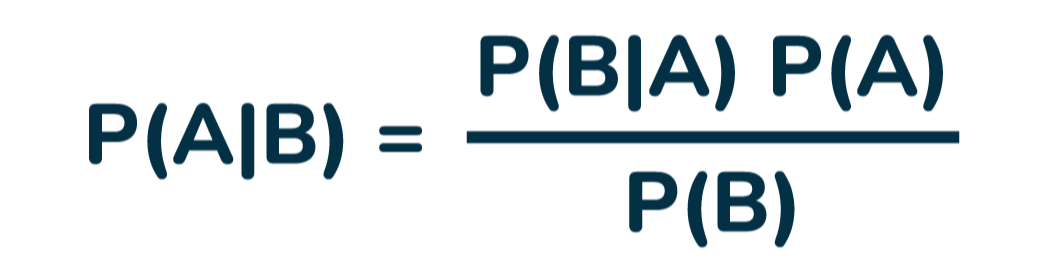

Where:

- $P(C∣X)$: Posterior probability — probability of class
$C$ given features
$X$.

- $P(X∣C)$: Likelihood — probability of features
$X$ given class
$C$.

- $P(C)$: Prior probability of class
$C$.

- $P(X)$: Evidence (normalizing constant).

- It is called “Naïve” because it assumes that all features (predictors) are independent of each other given the class label.

- For example, in spam detection:

  - Features like “money,” “win,” and “offer” are treated as independent,
even though in reality, they often appear together in spam messages.

This simplifying assumption makes the model computationally efficient and easy to train — but somewhat naïve since real-world data rarely satisfies complete feature independence.

**Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve
Bayes, and Bernoulli Naïve Bayes**

**Answer -**

- **Gaussian Naïve Bayes:**

 This classifier is used for continuous data, such as numerical values like height, weight, or temperature. It assumes that the values of each feature are distributed according to a normal (Gaussian) distribution.

- **Multinomial Naïve Bayes:**

This is suitable for discrete data that represents counts or frequencies, such as the number of times a word appears in a document. It is widely used in text classification and spam filtering.

- **Bernoulli Naïve Bayes:** This is designed for binary or Boolean features. It only considers the presence or absence of a feature, not its frequency. For instance, in text analysis, it would only indicate whether a specific word is in a document (1) or not (0).





**Question 10: Breast Cancer Dataset
Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer
dataset and evaluate accuracy.
Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from
sklearn.datasets.
(Include your Python code and output in the code box below.)**

In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data       # Features
y = data.target     # Target labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train (fit) the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Gaussian Naïve Bayes Classifier on Breast Cancer Dataset")
print("------------------------------------------------------")
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Gaussian Naïve Bayes Classifier on Breast Cancer Dataset
------------------------------------------------------
Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

